Коданев Никита, 416 группа вариант 16 (1)

In [19]:
install.packages(c("TSA", "lmtest"))
library(TSA)
library(lmtest)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [20]:
Data <- read.csv("var_1.csv",header = TRUE)
Data$Date <- as.Date(Data$Date)
head(Data)

,Date,Weekly.U.S..Regular.Conventional.Retail.Gasoline.Prices...Dollars.per.Gallon.
,<date>,<dbl>
1,2018-01-17,2.473
2,2018-01-24,2.482
3,2018-01-31,2.516
4,2018-02-07,2.544
5,2018-02-14,2.511
6,2018-02-21,2.455


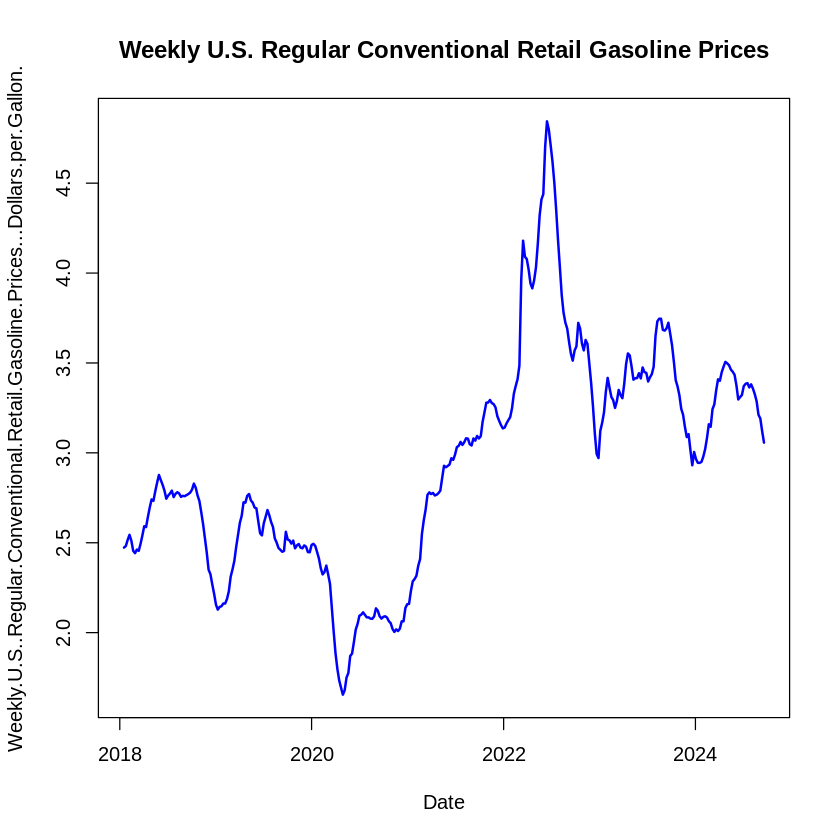

In [21]:
plot(Data,col = "blue",lwd = 2,type = "l",main = "Weekly U.S. Regular Conventional Retail Gasoline Prices")

In [22]:
y <-  diff(Data$Weekly.U.S..Regular.Conventional.Retail.Gasoline.Prices...Dollars.per.Gallon.)

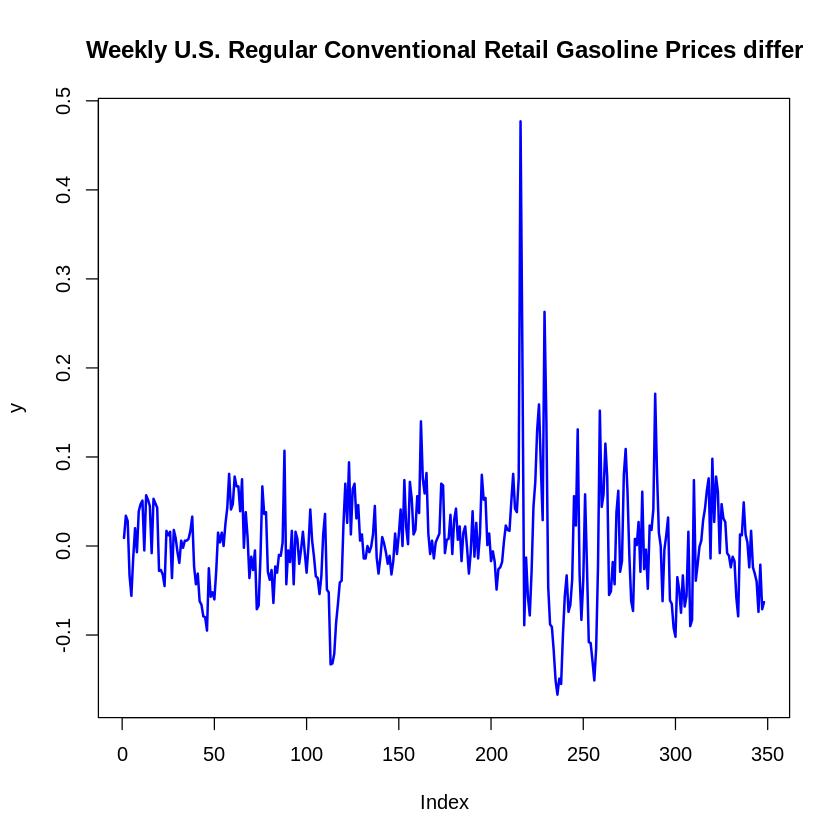

In [24]:
plot(y,col = "blue",lwd = 2,type = "l",main = "Weekly U.S. Regular Conventional Retail Gasoline Prices differ")

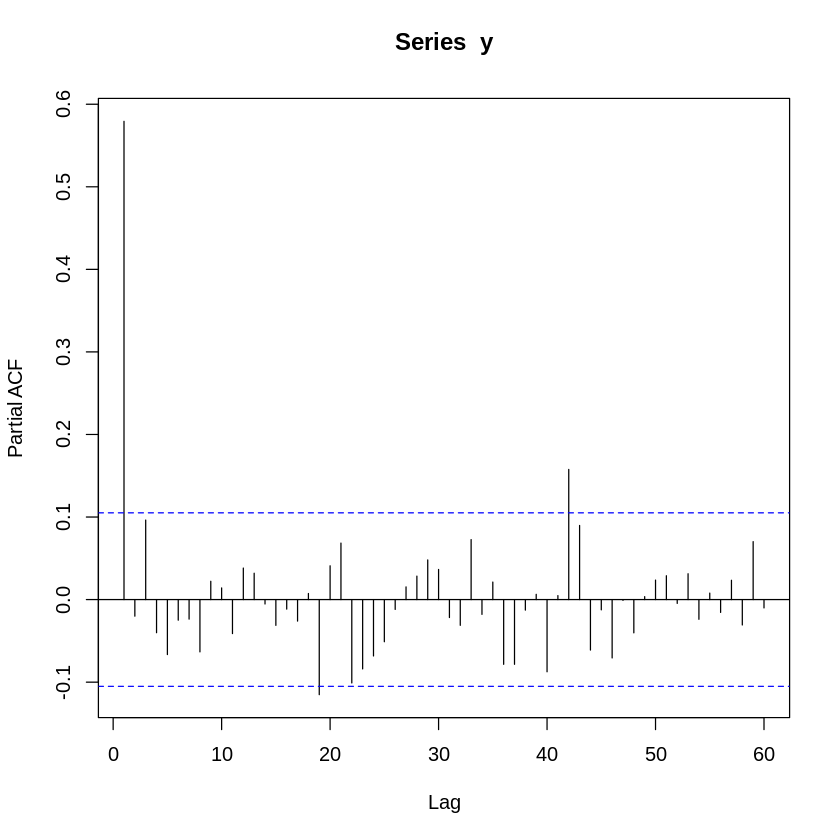

In [25]:
pacf(y, lag = 60)

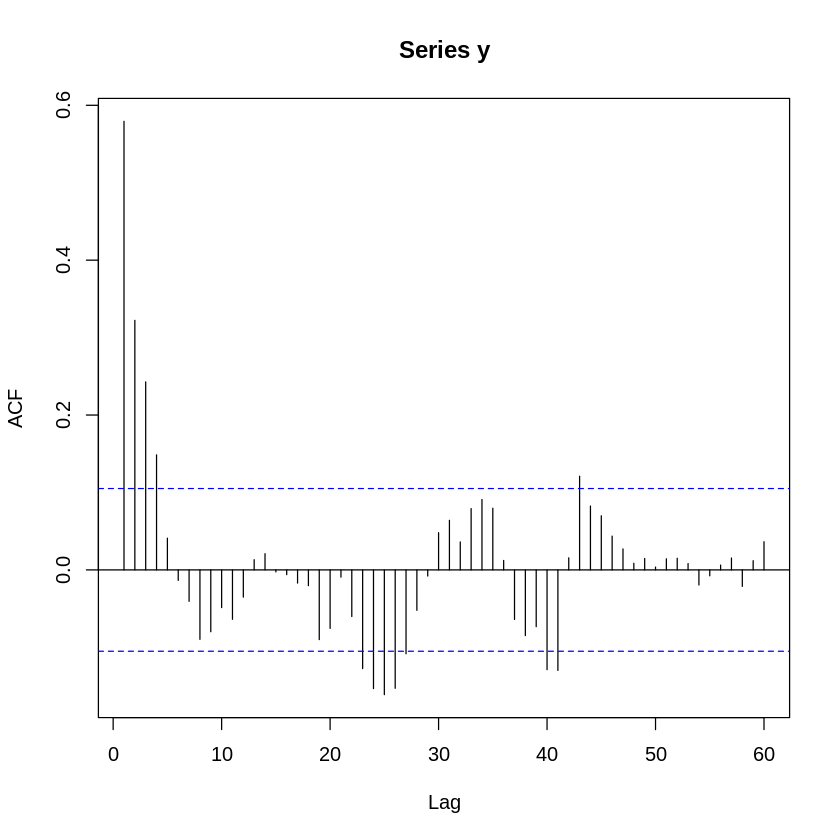

In [26]:
acf(y, lag=60)

In [79]:
sarma <- arima(y, order=c(1,0,0), seasonal = list(order= c(1,0,1),period = 41 ), method="ML")
sarma$aic
coeftest(sarma)

[1] -1089.517


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        0.5765047  0.0436582 13.2050 < 2.2e-16 ***
sar1       0.4953264  0.2202238  2.2492 0.0245001 *  
sma1      -0.7060763  0.2012850 -3.5078 0.0004518 ***
intercept  0.0019964  0.0043919  0.4546 0.6494292    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [34]:
sarma12_2 <- arima(y, order=c(1,0,2), seasonal = list(order= c(0,0,1),period = 19 ), method="ML")
sarma12_2$aic

[1] -1076.054

In [41]:
sarma12_3 <- arima(y, order=c(1,0,0), seasonal = list(order= c(0,0,1),period = 19 ), method="ML")
sarma12_3$aic

[1] -1078.036

По статитстике Акаике предпочтительнее выбрать модель SARMA(1,0,0)(1,0,1), так же все коэффициенты модели значимы.

Посмотрим на тест Льюинга-Бокса

In [80]:
res_sarma <- sarma$residuals

In [81]:
Box.test(res_sarma, lag = 6, type = "Ljung-Box", fitdf = 2)


	Box-Ljung test

data:  res_sarma
X-squared = 4.0639, df = 4, p-value = 0.3974


Гипотезу о независимоти и одинаковой распределенности остатков не отвергаем

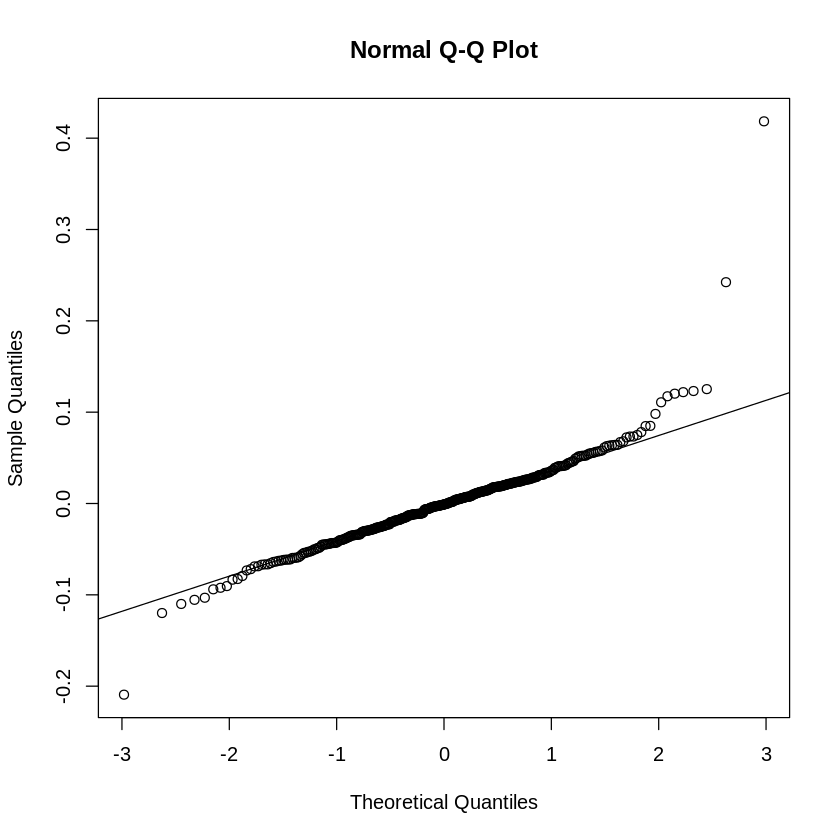

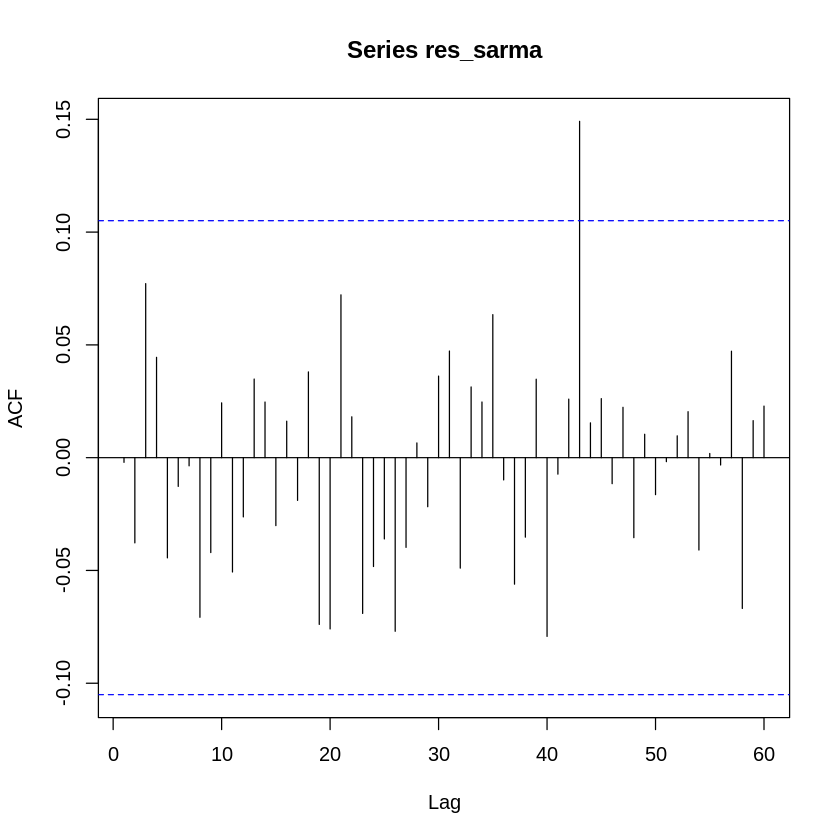

In [82]:
qqnorm(res_sarma)
qqline(res_sarma)
acf(res_sarma, lag = 60)

Теперь посмотрим на спектр изначальных данных и спектр остатков модели

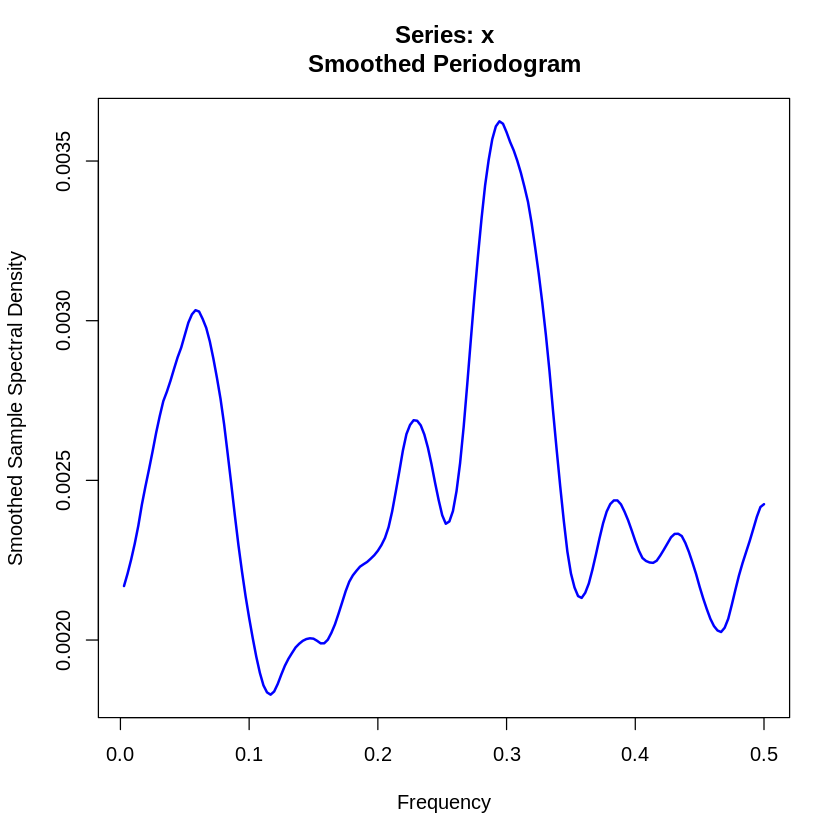

In [83]:
k3 <- kernel('daniell',c(5,5,5))
sp=spec(res_sarma,kernel=k3,log='no',sub='',xlab='Frequency', ylab='Smoothed Sample Spectral Density',col = "blue",lwd = 2)

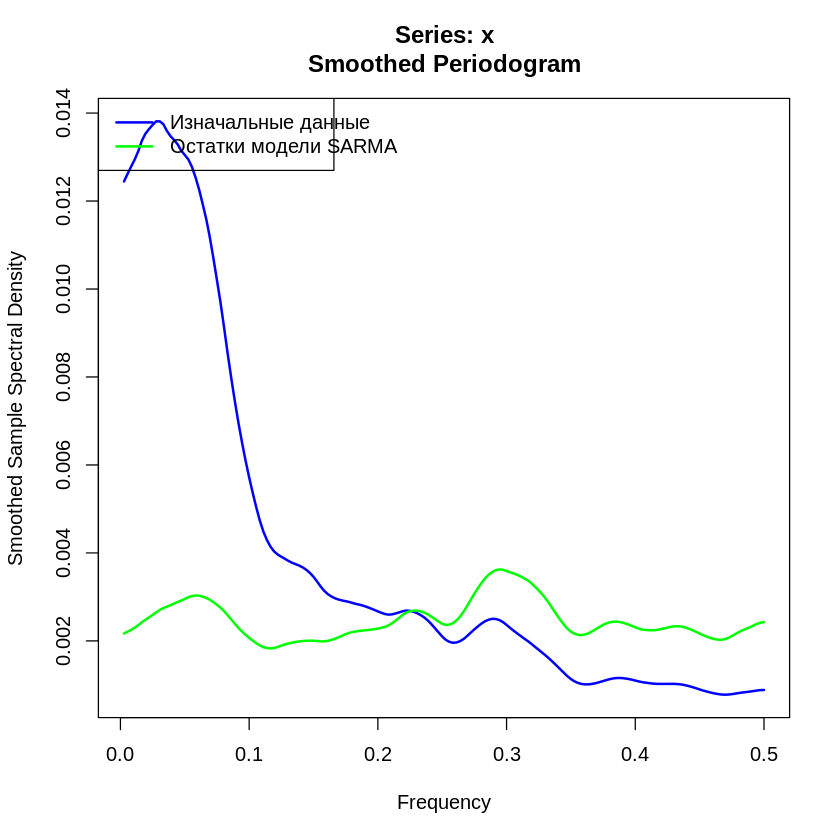

In [84]:
sp2=spec(y,kernel=k3,log='no',sub='',xlab='Frequency', ylab='Smoothed Sample Spectral Density',col = "blue",lwd = 2)
lines(sp$freq,sp$spec,col='green',lwd=2)
legend("topleft",c("Изначальные данные","Остатки модели SARMA"),lwd = 2,col=c("blue","green"))

Сезонность в наших данных не выявлена, поэтому построим прогноз и доверительный интервал прогноза уровня 0.95 на интервал сезонности вперед, то есть на 41 неделю

Предсказание по самому ряду

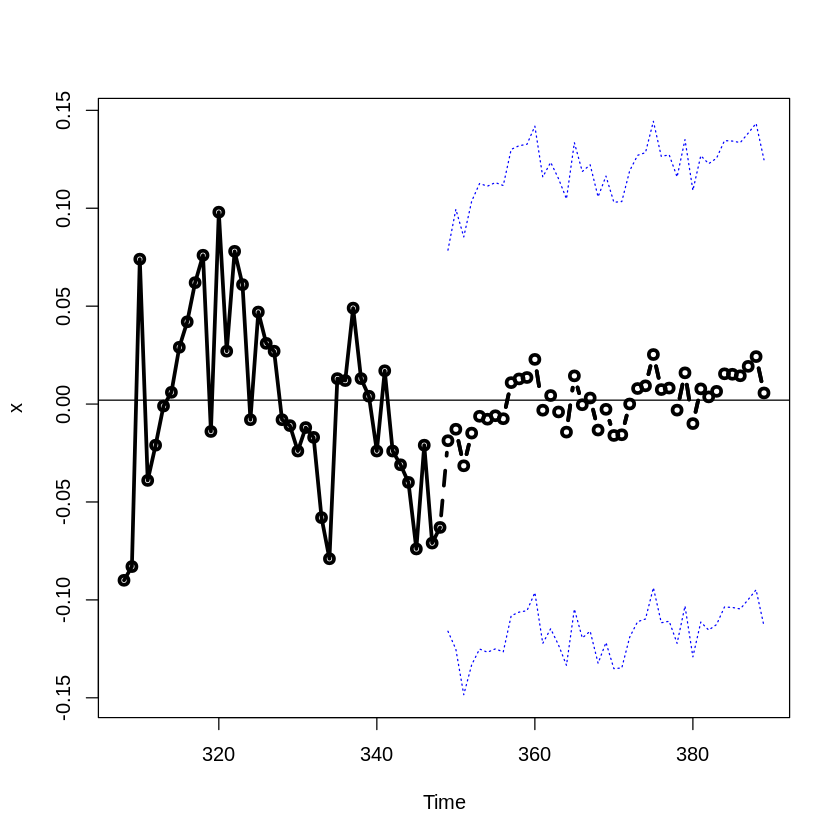

In [89]:
plot(sarma, n.ahead=41, type='b', xlab='Time', col="blue", n1=(length(res_sarma) - 40), lwd=3)
abline(h=coef(sarma)[names(coef(sarma))=='intercept'])

Имеем такой прогноз на 41 неделю вперед с последнего значения

Теперь построим предсказание по модели Хольта-Уинтерса

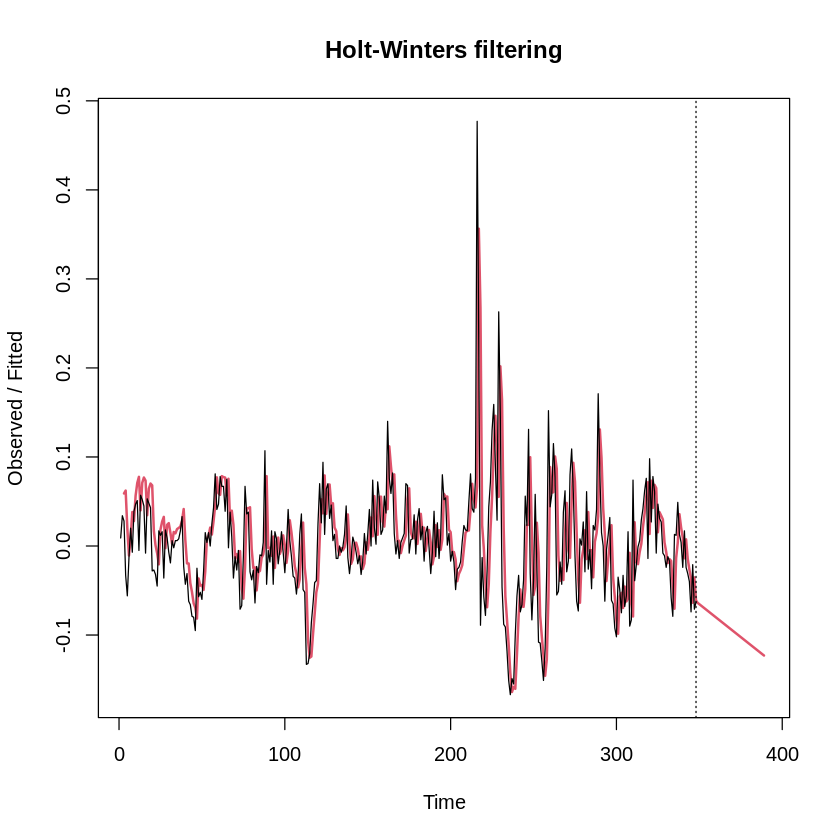

In [90]:
model <- HoltWinters(y, gamma= FALSE)
pred <- predict(model,n.ahead =41)
plot(model, predicted.values = pred,lwd=2)